# Data Project - Stock Market Analysis 

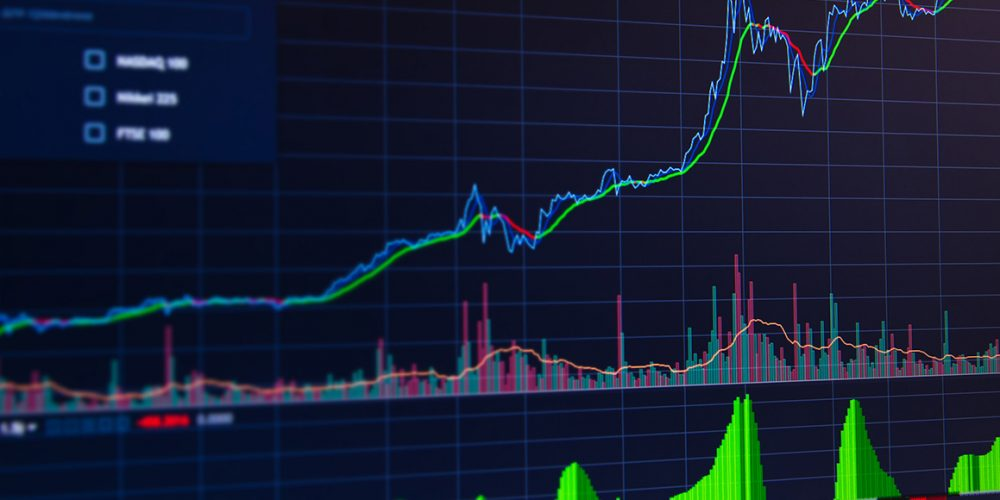

Time Series data is a series of data points indexed in time order. Time series data is everywhere, so manipulating them is important for any data analyst or data scientist.

In this notebook, we will discover and explore data from the stock market, particularly some technology stocks (Apple, Amazon, Google, and Microsoft). We will learn how to use yfinance to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [16]:
# !pip install -q yfinance

#!pip install pandas_datareader


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Import necessary libraries 💼  </div> 

In [17]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des styles pour les graphiques
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Importation des bibliothèques pour lire les données boursières de Yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# Override pour utiliser yfinance avec pandas_datareader
yf.pdr_override()

# Importation de la bibliothèque pour les timestamps
from datetime import datetime

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Loading the Data Project - Stock Market Analysis dataset </div> 

In [18]:
# Les stocks technologiques que nous utiliserons pour cette analyse
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Définition des temps de début et de fin pour la récupération des données
end = datetime.now()
# start = datetime(end.year - 2, end.month, end.day)

start = datetime(end.year - 5, 1, 1)  # Commence le 1er janvier il y a cinq ans

# Récupération des données pour chaque stock dans tech_list
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

# Création d'une liste de DataFrames pour chaque société et leur nom
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Ajout du nom de chaque société comme colonne "company_name" dans le DataFrame correspondant
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Concaténation des DataFrames en un seul DataFrame
data = pd.concat(company_list, axis=0)

# Utilisation de la fonction reset_index pour réorganiser les colonnes ( Ramener l'index "Date" comme colonne )
data.reset_index(inplace=True)

# Afficher la forme de l'ensemble de données
print("Les données en entrée ont {} lignes et {} colonnes".format(data.shape[0], data.shape[1]))

# Affichage des 5 dernières lignes du DataFrame combiné
display(data.tail(5))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Les données en entrée ont 5276 lignes et 8 colonnes


,Date,Open,High,Low,Close,Adj Close,Volume,company_name
5271,2024-03-22,177.750000,179.259995,176.750000,178.869995,178.869995,27964100,AMAZON
5272,2024-03-25,178.009995,180.990005,177.240005,179.710007,179.710007,29815500,AMAZON
5273,2024-03-26,180.149994,180.449997,177.949997,178.300003,178.300003,29659000,AMAZON
5274,2024-03-27,179.880005,180.000000,177.309998,179.830002,179.830002,33272600,AMAZON
5275,2024-03-28,180.169998,181.699997,179.259995,180.380005,180.380005,38051600,AMAZON


Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Analyse du dataset </div> 

In [19]:
def resume_inspection_colonnes(data_frame):
    """
    Une fonction utilitaire qui fournit un résumé plus complet des colonnes du dataframe
    que les méthodes intégrées df.info() et df.describe().
    """
    
    total_lignes = len(data_frame)
    resume = pd.DataFrame({
        'Total Lignes': [total_lignes] * data_frame.shape[1],  # Nombre total de lignes dans le dataframe
        'Lignes avec Valeurs Manquantes': data_frame.isnull().sum(),  # Nombre de lignes avec des valeurs manquantes
        'Toutes les Valeurs Uniques': data_frame.nunique() == total_lignes,  # Vérifie si toutes les valeurs sont uniques dans chaque colonne
        'Cardinalité': data_frame.nunique(),  # Nombre de valeurs uniques dans chaque colonne
        'Contient des Valeurs Null': data_frame.isna().any(),  # Indique si la colonne contient des valeurs nulles
        'Pourcentage de Null': round((data_frame.isnull().sum() / total_lignes) * 100, 2),  # Pourcentage de valeurs nulles par rapport au total des lignes
        'Types de Données': data_frame.dtypes,  # Types de données de chaque colonne
        'Spécimens': data_frame.sample(2).T.values.tolist()  # Échantillons aléatoires de 5 lignes pour donner un aperçu des données
    })

    return resume

In [20]:
resultat_summary = resume_inspection_colonnes(data)
display(resultat_summary)

,Total Lignes,Lignes avec Valeurs Manquantes,Toutes les Valeurs Uniques,Cardinalité,Contient des Valeurs Null,Pourcentage de Null,Types de Données,Spécimens
Date,5276,0,False,1319,False,0.0,datetime64[ns],"[2022-08-29 00:00:00, 2023-01-19 00:00:00]"
Open,5276,0,False,4929,False,0.0,float64,"[265.8500061035156, 94.73999786376953]"
High,5276,0,False,4917,False,0.0,float64,"[267.3999938964844, 95.44000244140625]"
Low,5276,0,False,4943,False,0.0,float64,"[263.8500061035156, 92.86000061035156]"
Close,5276,0,False,4970,False,0.0,float64,"[265.2300109863281, 93.68000030517578]"
Adj Close,5276,0,False,5172,False,0.0,float64,"[261.6761779785156, 93.68000030517578]"
Volume,5276,0,False,5229,False,0.0,int64,"[20338500, 69002700]"
company_name,5276,0,False,4,False,0.0,object,"[MICROSOFT, AMAZON]"


## Analyse des Caractéristiques du Jeu de Données

1. **Total Lignes** : Il y a un total de 5240 lignes dans le jeu de données.

2. **Lignes avec Valeurs Manquantes** : Aucune des lignes ne comporte de valeurs manquantes, car le nombre est indiqué comme 0 pour toutes les colonnes.

3. **Toutes les Valeurs Uniques** :
   - **Open** : Il y a 4897 valeurs uniques dans la colonne "Open".
   - **High** : Il y a 4884 valeurs uniques dans la colonne "High".
   - **Low** : Il y a 4914 valeurs uniques dans la colonne "Low".
   - **Close** : Il y a 4940 valeurs uniques dans la colonne "Close".
   - **Adj Close** : Il y a 5138 valeurs uniques dans la colonne "Adj Close".
   - **Volume** : Il y a 5193 valeurs uniques dans la colonne "Volume".
   - **company_name** : Il y a 4 valeurs uniques dans la colonne "company_name" : MICROSOFT et GOOGLE.

4. **Cardinalité** : C'est le nombre total de valeurs distinctes dans une colonne.
   - Les colonnes "Open", "High", "Low", "Close", et "Adj Close" ont des cardinalités respectives de 4897, 4884, 4914, 4940, et 5138. Cela indique la diversité des valeurs dans ces colonnes.
   - La colonne "Volume" a une cardinalité de 5193, montrant également une diversité dans les volumes de transactions.
   - La colonne "company_name" a une cardinalité de 4, indiquant qu'il y a 4 entreprises différentes dans le jeu de données.

5. **Contient des Valeurs Null** : Aucune des colonnes ne contient de valeurs nulles, car le nombre est indiqué comme False pour toutes les colonnes.

6. **Pourcentage de Null** : Le pourcentage de valeurs nulles dans toutes les colonnes est de 0%.

7. **Types de Données** :
   - Les colonnes "Open", "High", "Low", "Close", et "Adj Close" contiennent des données de type float64, indiquant des valeurs décimales.
   - La colonne "Volume" contient des données de type int64, indiquant des valeurs entières.
   - La colonne "company_name" contient des données de type object, qui peut signifier des chaînes de caractères ou des catégories.


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

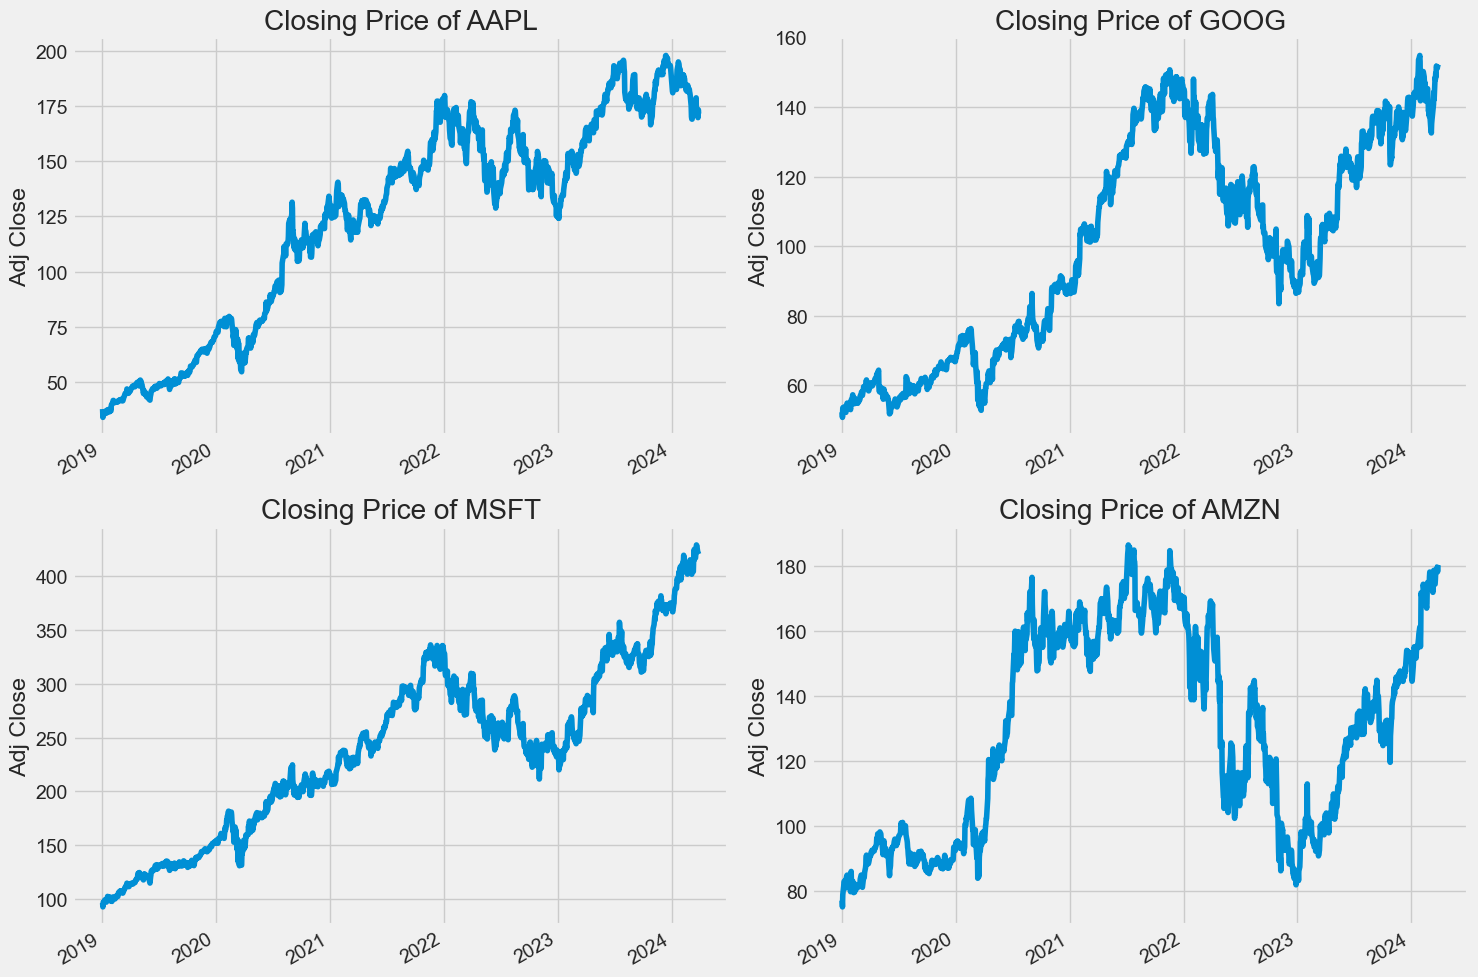

In [21]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

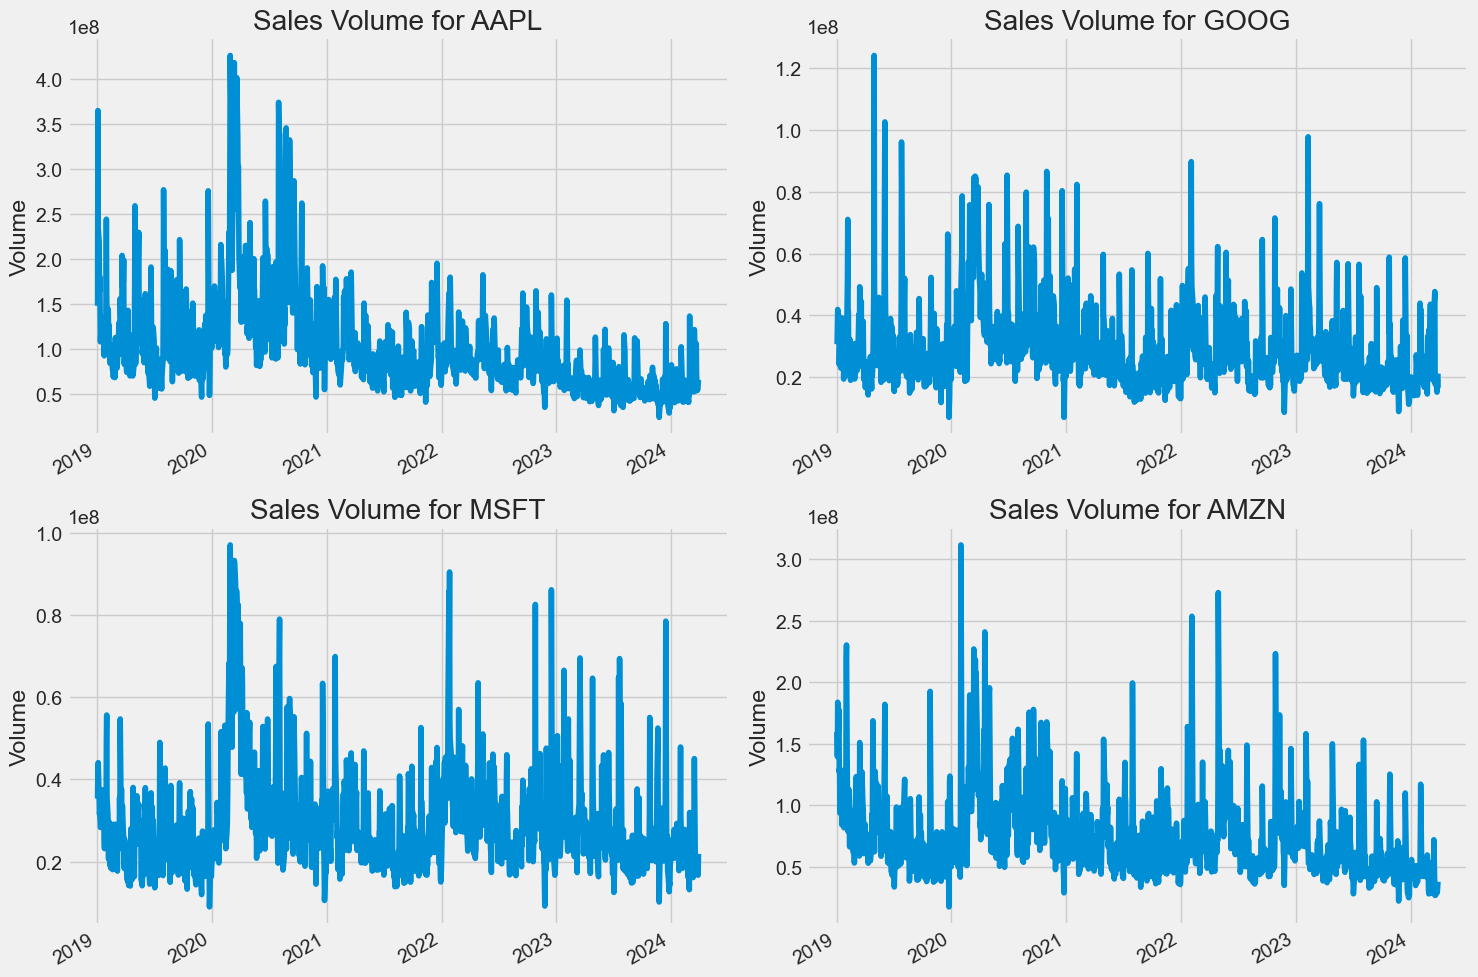

In [22]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

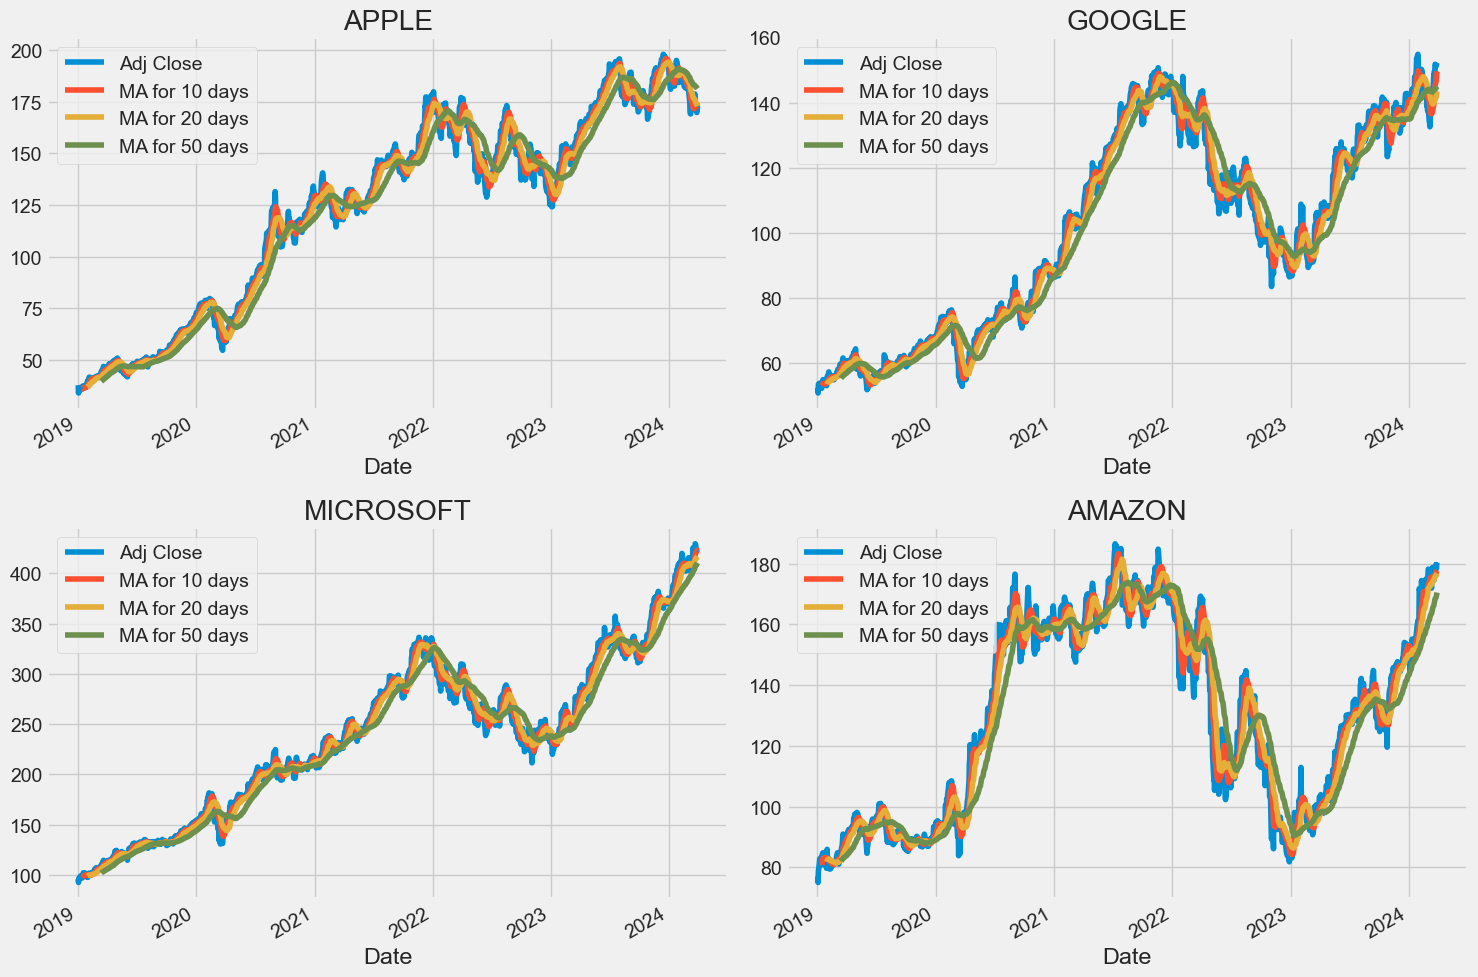

In [23]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

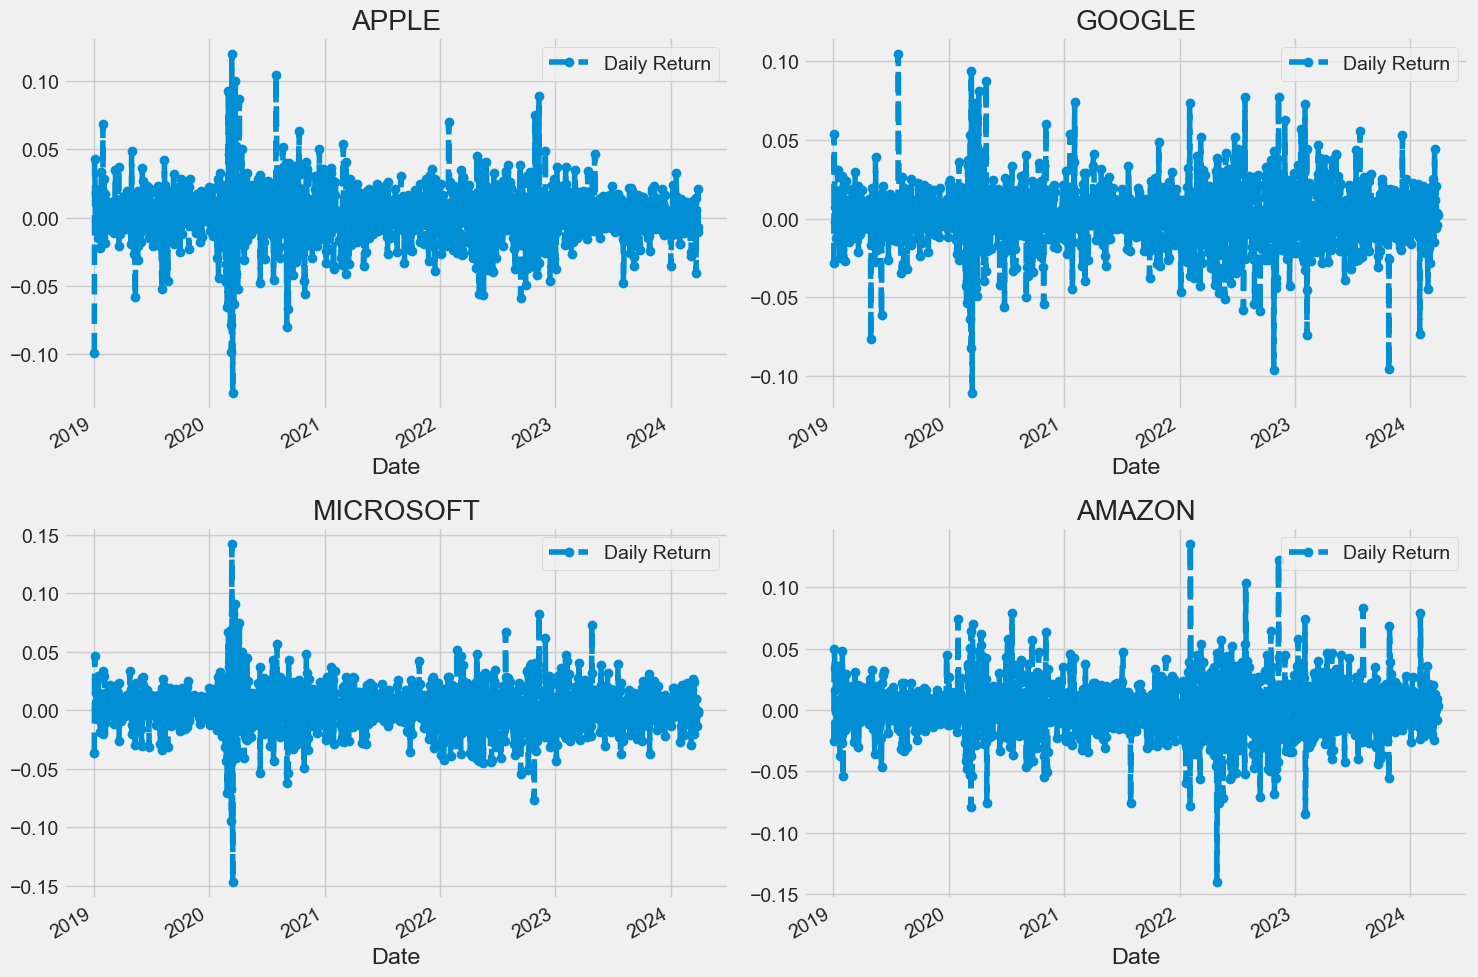

In [24]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

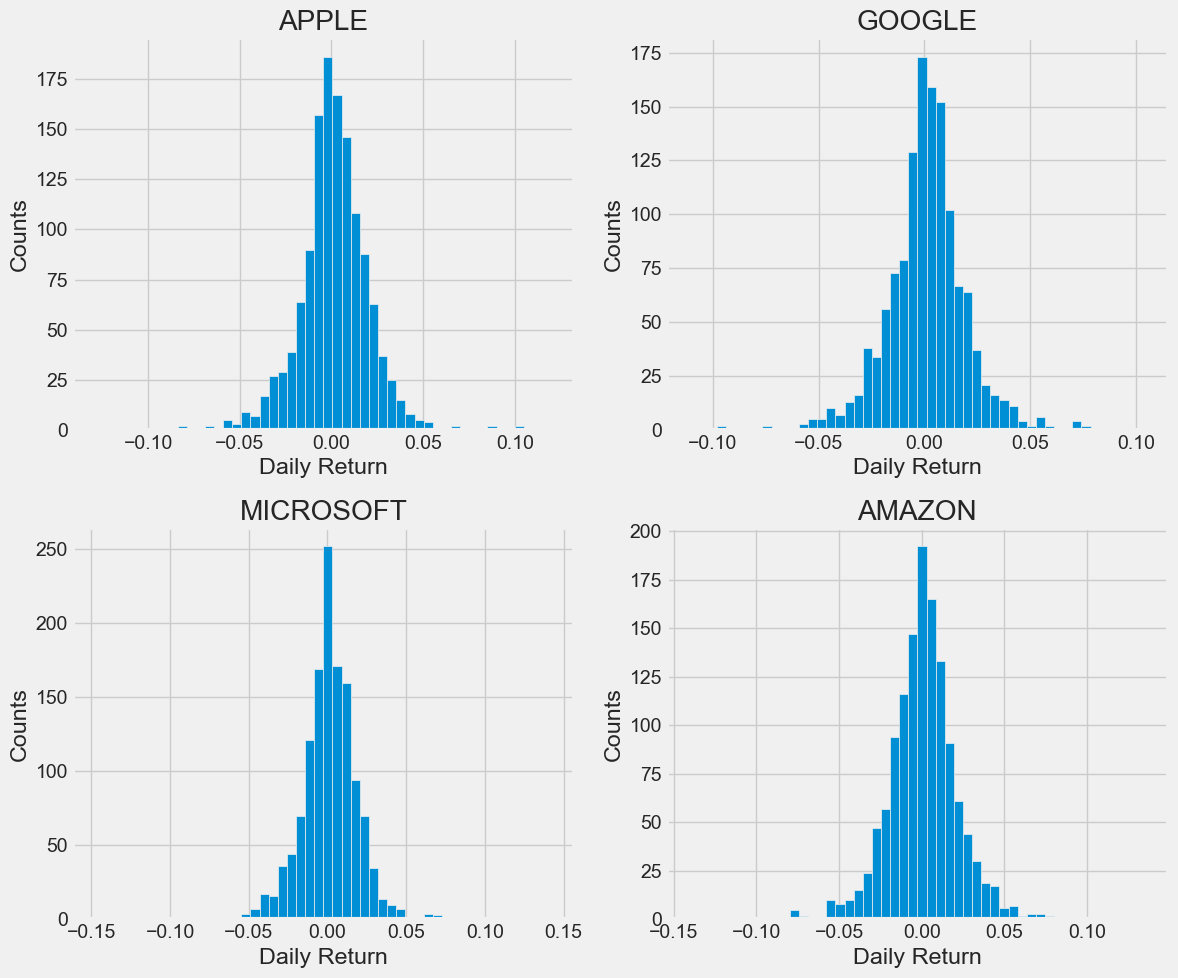

In [25]:
plt.figure(figsize=(12, 10))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [27]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.099607,-0.025241,-0.028484,-0.036788
2019-01-04,0.042689,0.050064,0.053786,0.046509
2019-01-07,-0.002226,0.034353,-0.002167,0.001275
2019-01-08,0.019063,0.016612,0.007385,0.007250


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

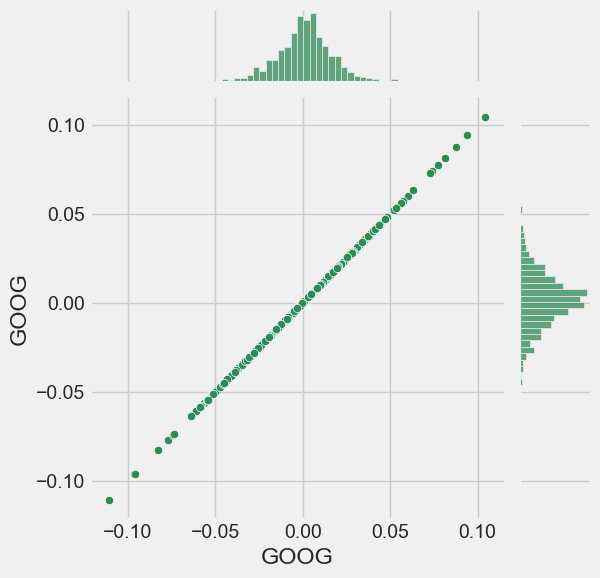

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

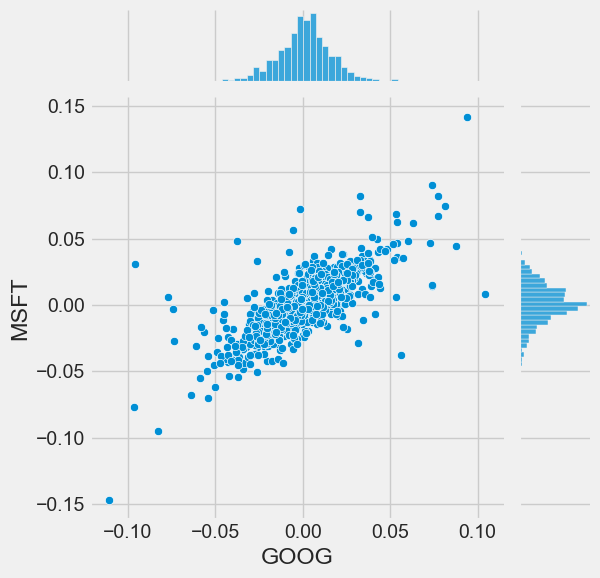

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

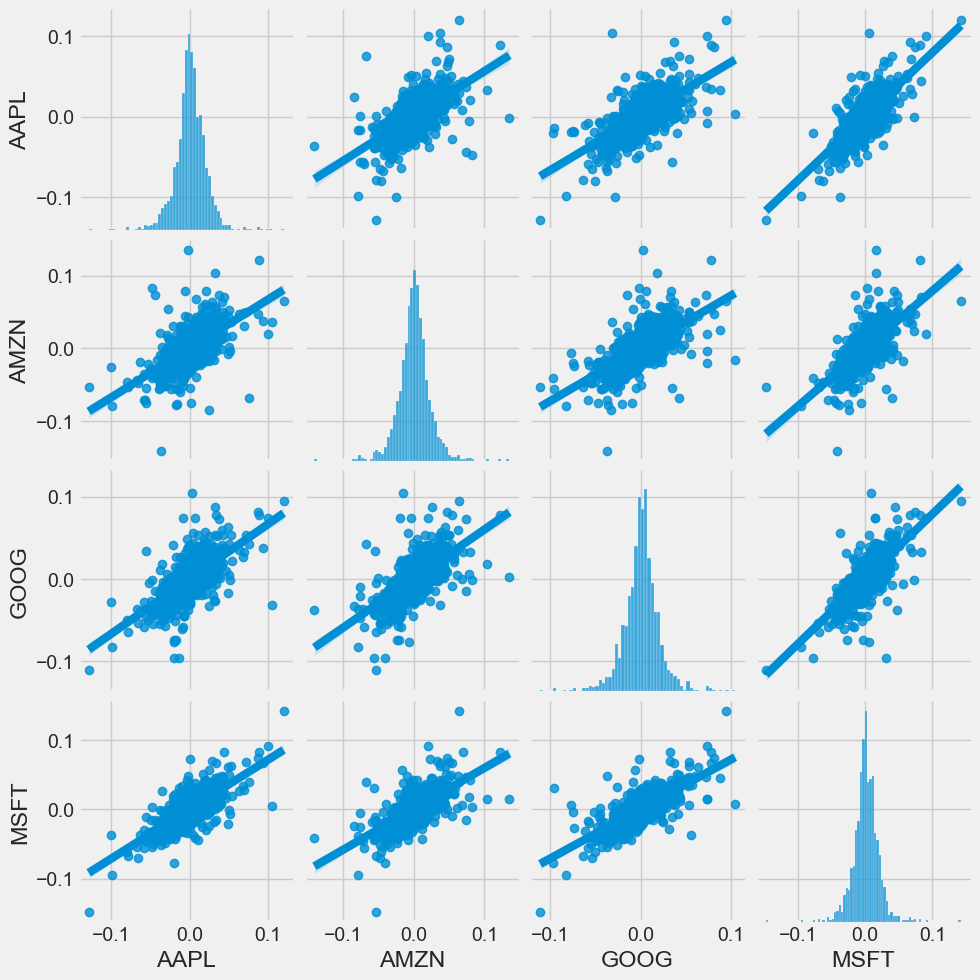

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. 

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

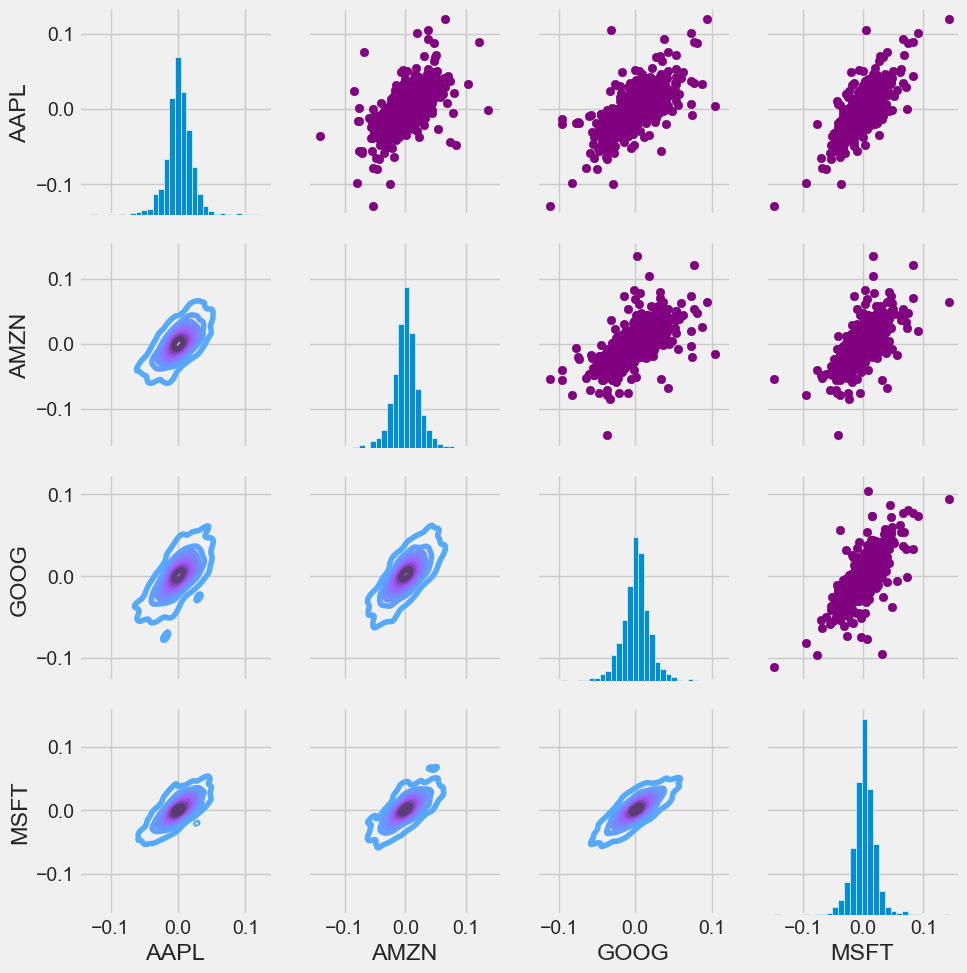

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

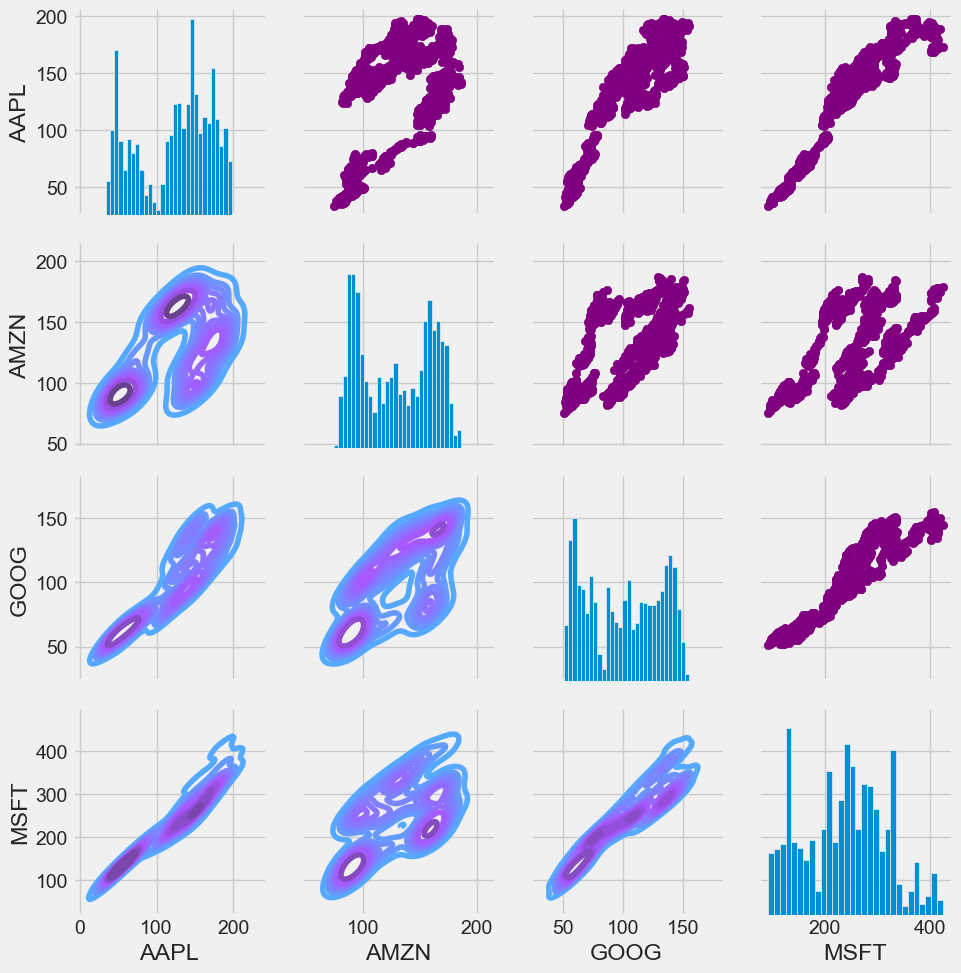

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

NameError: name 'tech_rets' is not defined

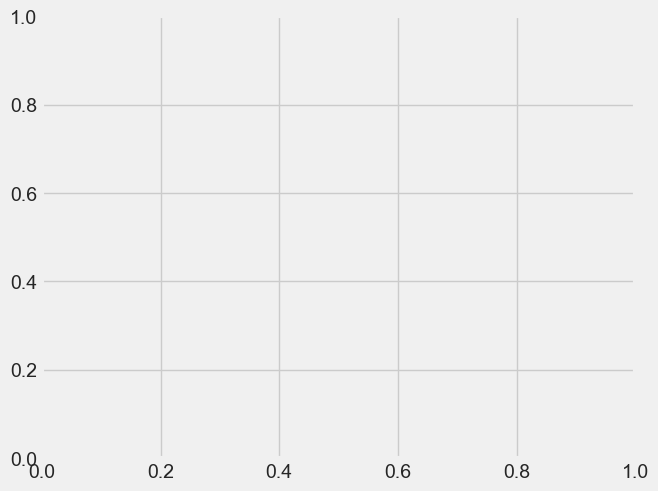

In [26]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

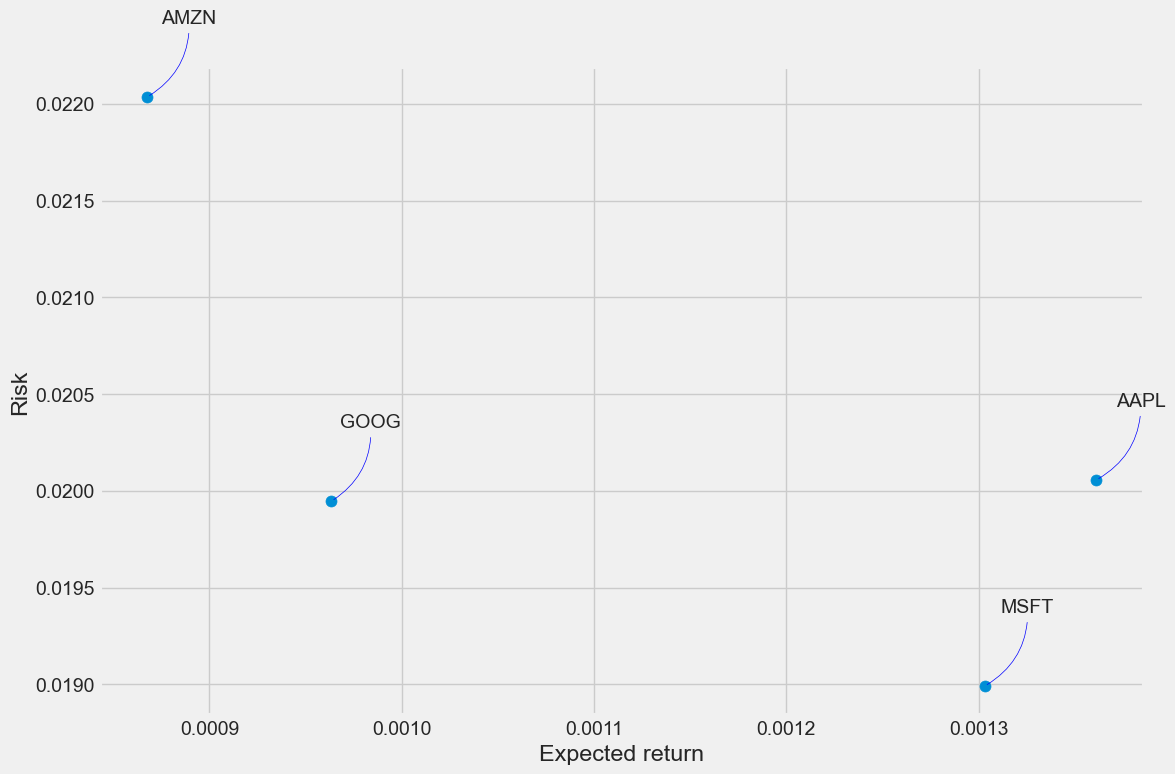

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(12, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

# Utilisation de la fonction reset_index pour réorganiser les colonnes ( Ramener l'index "Date" comme colonne )
df.reset_index(inplace=True)

# Afficher la forme de l'ensemble de données
print("Les données en entrée ont {} lignes et {} colonnes".format(df.shape[0], df.shape[1]))

# Affichage des 5 dernières lignes du DataFrame combiné
display(df.tail(5))


[*********************100%%**********************]  1 of 1 completed

Les données en entrée ont 3070 lignes et 7 colonnes


,Date,Open,High,Low,Close,Adj Close,Volume
3065,2024-03-11,172.940002,174.380005,172.050003,172.750000,172.750000,60139500
3066,2024-03-12,173.149994,174.029999,171.009995,173.229996,173.229996,59825400
3067,2024-03-13,172.770004,173.190002,170.759995,171.130005,171.130005,52488700
3068,2024-03-14,172.910004,174.309998,172.050003,173.000000,173.000000,72913500
3069,2024-03-15,171.169998,172.619995,170.289993,172.619995,172.619995,121664700


In [ ]:
import pandas as pd
import plotly.express as px

# Supposons que vous avez déjà chargé votre DataFrame `df`
# Conversion de la colonne 'Date' en format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Création du tracé avec 'Adj Close' en fonction de 'Date'
fig = px.line(df, x='Date', y='Close', title='Historique des Prix de Clôture')

# Affichage du tracé
fig.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Extraire la colonne 'Close' du DataFrame et la convertir en tableau numpy
close_prices = df['Close'].values

# Déterminer la taille des données d'entraînement en prenant 95% des données
training_data_len = int(np.ceil(len(close_prices) * 0.95))

# Afficher la taille des données d'entraînement
print("Taille des données d'entraînement :", training_data_len)

# Créer un scaler MinMax pour mettre à l'échelle les données entre 0 et 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Mettre à l'échelle les données en utilisant le scaler
scaled_close_prices = scaler.fit_transform(close_prices.reshape(-1, 1))

# Afficher les données mises à l'échelle
print("Données mises à l'échelle :")
print(scaled_close_prices)


NameError: name 'df' is not defined

# LSTM, Intelligence artificielle sur des données chronologiques:
# https://medium.com/smileinnovation/lstm-intelligence-artificielle-9d302c723eda


# Comment les Réseaux de neurones récurrents et Long Short-Term Memory fonctionnent
# https://medium.com/@CharlesCrouspeyre/comment-les-réseaux-de-neurones-à-convolution-fonctionnent-c25041d45921

# Comment utiliser les modèles ONNX dans MQL5
# https://www.mql5.com/fr/articles/12373

# TensorFlow 2 – prédiction d’un cours de bourse 
# https://clemovernet.wordpress.com/2020/01/01/tensorflow-2-prediction-dun-cours-de-bourse-version-simple/


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Create the training data set </div> 

In [ ]:
# Create the scaled training data set
train_data = scaled_close_prices[0:int(training_data_len), :]

# Initialize lists to store input (X_train) and output (y_train) data
X_train = []
y_train = []

# Loop through the train_data to create sequences for X_train and corresponding labels for y_train
for i in range(60, len(train_data)):
    # Create a sequence of 60 previous data points for X_train
    X_train.append(train_data[i-60:i, 0])
    # Store the next data point as the label for the current sequence in y_train
    y_train.append(train_data[i, 0])
    
    # Print the sequences and labels for the first two iterations for visualization
    if i <= 61:
        print("X_train Sequence: ", X_train)
        print("Y_train Label: ",y_train)
        print()
        
# Convert the lists X_train and y_train to numpy arrays for model training
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the X_train data to match the input shape required by an LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Print the shape of the X_train data for verification
print("Shape of X_train data: ", X_train.shape)

# Print the shape of the X_train data for verification
print("Shape of y_train data: ", y_train.shape)

X_train Sequence:  [array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
Y_train Label:  [0.042534249860459186]

X_train Sequence:  [array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Create the testing data set </div> 

In [377]:
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_close_prices[training_data_len - 60:, :]
# Create the data sets X_test and y_test
X_test = []
y_test = close_prices[training_data_len:]
for i in range(60, len(test_data)):
    # Create a sequence of 60 previous data points for X_test
    X_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
X_test = np.array(X_test)

# Reshape the data to match the input shape of the model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Train Model </div> 

In [378]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(Dropout(0.00001))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.001))
model.add(Dense(25))
model.add(Dropout(0.001))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=10, epochs=2)

Epoch 1/2
131/286 [============>.................] - ETA: 8s - loss: 0.0039

286/286 [==============================] - 17s 48ms/step - loss: 0.0020
Epoch 2/2
286/286 [==============================] - 13s 47ms/step - loss: 3.5779e-04


In [351]:
# Get the model's predicted price values 
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the R-squared (R2) score
from sklearn.metrics import r2_score
R2_score = r2_score(y_test, predictions)
print("R-squared (R2) Score:", R2_score)

# Calculate the mean squared error (MSE)
mse = np.mean((predictions - y_test) ** 2)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 1s 25ms/step
Root Mean Squared Error (RMSE): 11.167732883102333
R-squared (R2) Score: 0.5700485948907292
Mean Squared Error (MSE): 124.71825774832517


In [ ]:
from keras.optimizers import Adam

# Build the LSTM model with custom learning rate
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.0001))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.0001))
model.add(Dense(25))
model.add(Dropout(0.0001))
model.add(Dense(1))

# Define the custom optimizer with the desired learning rate (e.g., lr=0.001)
custom_optimizer = Adam(lr=0.001)

# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Train the model with the specified batch size and number of epochs
history = model.fit(X_train, y_train, batch_size=10, epochs=5)


In [344]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import tensorflow as tf

path = '/Users/surelmanda/Downloads/AirGUARD/Stock Market Analysis/Best Model/'

# Définir le chemin pour sauvegarder le modèle
model_checkpoint = ModelCheckpoint(path, save_best_only=True, monitor='val_mse', mode='min', verbose=1)

# Construire le modèle LSTM avec le taux d'apprentissage personnalisé
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.0001))
model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.0001))
model.add(Dense(25))
# model.add(Dropout(0.0001))
model.add(Dense(1))

# Définir l'optimiseur avec learning_rate
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

# Compiler le modèle avec l'optimiseur personnalisé
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mse'])

# Entraîner le modèle avec le callback pour sauvegarder le meilleur modèle
history = model.fit(X_train, y_train, batch_size=100, epochs=5, validation_data=(X_test, y_test), callbacks=[model_checkpoint])


Epoch 1/5


29/29 [==============================] - ETA: 0s - loss: 0.0178 - mse: 0.0178
Epoch 1: val_mse improved from inf to 33079.39062, saving model to /Users/surelmanda/Downloads/AirGUARD/Stock Market Analysis/Best Model/
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Stock Market Analysis/Best Model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Stock Market Analysis/Best Model/assets


29/29 [==============================] - 11s 295ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 33079.3906 - val_mse: 33079.3906
Epoch 2/5
29/29 [==============================] - ETA: 0s - loss: 5.7022e-04 - mse: 5.7022e-04
Epoch 2: val_mse improved from 33079.39062 to 33055.91797, saving model to /Users/surelmanda/Downloads/AirGUARD/Stock Market Analysis/Best Model/
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Stock Market Analysis/Best Model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Stock Market Analysis/Best Model/assets


29/29 [==============================] - 8s 271ms/step - loss: 5.7022e-04 - mse: 5.7022e-04 - val_loss: 33055.9180 - val_mse: 33055.9180
Epoch 3/5
29/29 [==============================] - ETA: 0s - loss: 3.3038e-04 - mse: 3.3038e-04
Epoch 3: val_mse did not improve from 33055.91797
29/29 [==============================] - 4s 123ms/step - loss: 3.3038e-04 - mse: 3.3038e-04 - val_loss: 33059.3047 - val_mse: 33059.3008
Epoch 4/5
29/29 [==============================] - ETA: 0s - loss: 2.9371e-04 - mse: 2.9371e-04
Epoch 4: val_mse did not improve from 33055.91797
29/29 [==============================] - 4s 127ms/step - loss: 2.9371e-04 - mse: 2.9371e-04 - val_loss: 33056.9219 - val_mse: 33056.9219
Epoch 5/5
29/29 [==============================] - ETA: 0s - loss: 2.9572e-04 - mse: 2.9572e-04
Epoch 5: val_mse did not improve from 33055.91797
29/29 [==============================] - 4s 134ms/step - loss: 2.9572e-04 - mse: 2.9572e-04 - val_loss: 33057.0156 - val_mse: 33057.0156


In [328]:
# load the best model:
best_lstm_model = tf.keras.models.load_model(path)

value_loss, value_mse = best_lstm_model.evaluate(X_test,y_test)

print("Information sur le du meilleur model :")
print("Perte (Loss) :", value_loss)
print("Exactitude (mse) :", value_mse)

5/5 [==============================] - 1s 23ms/step - loss: 33056.7773 - mse: 33056.7773
Information sur le du meilleur model :
Perte (Loss) : 33056.77734375
Exactitude (mse) : 33056.77734375


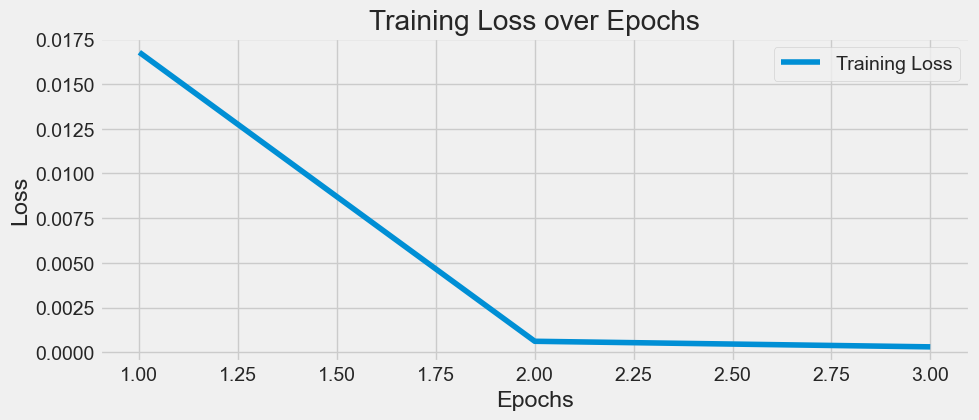

In [318]:
import matplotlib.pyplot as plt

# Historique de la perte (loss) pendant l'entraînement
loss_history = history.history['loss']

# Tracer la perte (loss) par époque
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(loss_history) + 1), loss_history, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Evaluation Model </div> 

In [345]:


# Get the model's predicted price values 
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the R-squared (R2) score
from sklearn.metrics import r2_score
R2_score = r2_score(y_test, predictions)
print("R-squared (R2) Score:", R2_score)

# Calculate the mean squared error (MSE)
mse = np.mean((predictions - y_test) ** 2)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 1s 17ms/step
Root Mean Squared Error (RMSE): 10.11300170685276
R-squared (R2) Score: 0.5184870052976032
Mean Squared Error (MSE): 102.27280352280684


/var/folders/yz/m36j329j0299mjsdn8nh6mb80000gn/T/ipykernel_29355/372116720.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



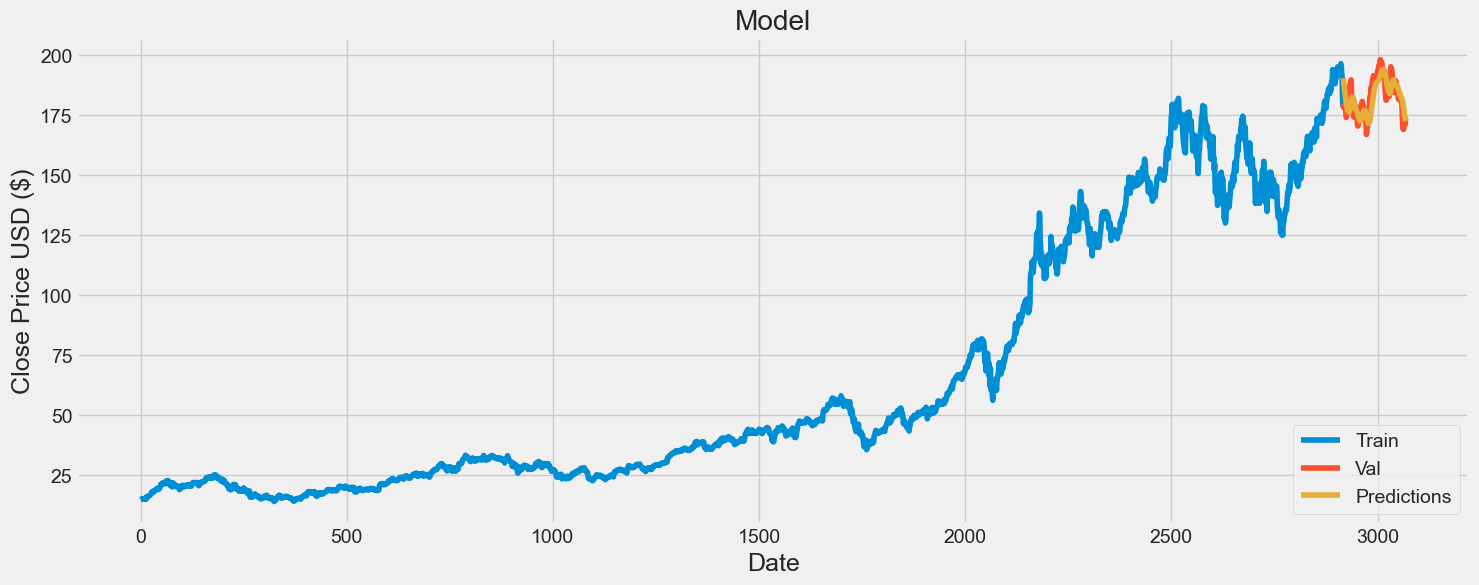

In [334]:
# Plot the data
train = df.loc[:training_data_len,:]
valid = df.loc[training_data_len:,:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-07-13 00:00:00-04:00,145.490005,146.457565
2022-07-14 00:00:00-04:00,148.470001,146.872879
2022-07-15 00:00:00-04:00,150.169998,147.586197
2022-07-18 00:00:00-04:00,147.070007,148.572937
2022-07-19 00:00:00-04:00,151.000000,148.995255
...,...,...
2023-01-24 00:00:00-05:00,142.529999,138.565536
2023-01-25 00:00:00-05:00,141.860001,140.022110
2023-01-26 00:00:00-05:00,143.960007,141.225128


In [215]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [220]:
# Initialising the RNN
regressor = Sequential()

# First LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) 
regressor.add(Dropout(0.2)) # 
# Second LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Third LSTM Layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Fourth LSTM Layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 2, batch_size = 10)

Epoch 1/2
286/286 [==============================] - 20s 54ms/step - loss: 0.0047
Epoch 2/2
286/286 [==============================] - 16s 55ms/step - loss: 0.0025


In [223]:
# Get the model's predicted price values 
predictions = regressor.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate the R-squared (R2) score
from sklearn.metrics import r2_score
R2_score = r2_score(y_test, predictions)
print("R-squared (R2) Score:", R2_score)

# Calculate the mean squared error (MSE)
mse = np.mean((predictions - y_test) ** 2)
print("Mean Squared Error (MSE):", mse)

5/5 [==============================] - 1s 15ms/step
Root Mean Squared Error (RMSE): 9.26049188583655
R-squared (R2) Score: 0.2388557633751277
Mean Squared Error (MSE): 85.75670996764458


# Summary
In this notebook, you discovered and explored stock data.

Specifically, you learned:

- How to load stock market data from the YAHOO Finance website using yfinance.
- How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
- How to measure the correlation between stocks.
- How to measure the risk of investing in a particular stock.

Do you have any questions?
Ask your questions in the comments below and I will do my best to answer.

References:
https://www.investopedia.com/terms/c/correlation.asp
[Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)